In [1]:
cd ..

/home/janek/mag/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics
from sklearn.decomposition import PCA
from tqdm import tqdm

from src.reasoner_mod import *
from src.simplefact import *
from src.simplefact.syntax import *
from src.reasoner import *
from src.generate import *
from src.utils import *
from src.vis import *
import random
seed = 2022
ts = timestr()

In [3]:
ontos, data_tr, data_vl, data_te = load_test_dataset('local/out/dataset/dataExp6-9.json')
idx_te, X_te, y_te = data_te[0], data_te[1], data_te[2]

In [4]:

emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)


T.manual_seed(seed)
transfer_r_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_head = ModifiedReasonerHead(**head_params)
transfer_r_head.load_state_dict(T.load('local/out/exp/20240808T171513/reasonerM.pt'))

print('----')

print('frozen reasoner head (modified)')
T.manual_seed(seed)
random.seed(seed)
transfer_log = train_mod(data_tr, data_vl, transfer_r_head, transfer_r_embs, freeze_reasoner=True, run_name='frozen transfer modified', **train_params)


----
frozen reasoner head (modified)
train epoch 00/10 | batch 2626/2625 | loss 1.5421 | val loss 1.7018 | acc 0.5971 | f1 0.3274 | prec 0.2209 | recall 0.6324 | roc auc 0.6602 | pr auc 0.2948 | elapsed 48.33s
train epoch 01/10 | batch 2626/2625 | loss 0.9461 | val loss 0.6512 | acc 0.7958 | f1 0.4973 | prec 0.4022 | recall 0.6514 | roc auc 0.8142 | pr auc 0.5269 | elapsed 123.03s
train epoch 02/10 | batch 2626/2625 | loss 0.4540 | val loss 0.4305 | acc 0.8572 | f1 0.5884 | prec 0.5318 | recall 0.6585 | roc auc 0.8737 | pr auc 0.6420 | elapsed 127.24s
train epoch 03/10 | batch 2626/2625 | loss 0.3123 | val loss 0.3530 | acc 0.8803 | f1 0.6363 | prec 0.6017 | recall 0.6750 | roc auc 0.9014 | pr auc 0.7033 | elapsed 126.08s
train epoch 04/10 | batch 2626/2625 | loss 0.2459 | val loss 0.3136 | acc 0.8915 | f1 0.6623 | prec 0.6400 | recall 0.6861 | roc auc 0.9166 | pr auc 0.7395 | elapsed 128.42s
train epoch 05/10 | batch 2626/2625 | loss 0.2050 | val loss 0.2898 | acc 0.8991 | f1 0.6833 |

In [5]:
ts = timestr()

emb_size = 10
embs_params = dict(emb_size=emb_size)
head_params = dict(emb_size=emb_size, hidden_size=16)
train_params = dict(epoch_count=10, batch_size=32)

T.manual_seed(seed)
transfer_r_orig_embs = EmbeddingLayer.from_ontos(ontos, emb_size=emb_size)
transfer_r_orig_head = ReasonerHead(**head_params)
transfer_r_orig_head.load_state_dict(T.load('local/out/exp/20240808T171513/reasonerO.pt'))


print('frozen reasoner head (original)')
T.manual_seed(seed)
transfer_log_orig = train(data_tr, data_vl, transfer_r_orig_head, transfer_r_orig_embs, freeze_reasoner=True, run_name='frozen transfer original', **train_params)


frozen reasoner head (original)
train epoch 00/10 | batch 2626/2625 | loss 1.4088 | val loss 1.3989 | acc 0.6535 | f1 0.3494 | prec 0.2465 | recall 0.6001 | roc auc 0.6885 | pr auc 0.3346 | elapsed 52.66s
train epoch 01/10 | batch 2626/2625 | loss 0.7893 | val loss 0.4880 | acc 0.8446 | f1 0.5608 | prec 0.4992 | recall 0.6399 | roc auc 0.8472 | pr auc 0.5862 | elapsed 149.83s
train epoch 02/10 | batch 2626/2625 | loss 0.3694 | val loss 0.3559 | acc 0.8858 | f1 0.6388 | prec 0.6270 | recall 0.6510 | roc auc 0.8904 | pr auc 0.6871 | elapsed 130.34s
train epoch 03/10 | batch 2626/2625 | loss 0.2677 | val loss 0.3124 | acc 0.8981 | f1 0.6699 | prec 0.6731 | recall 0.6668 | roc auc 0.9084 | pr auc 0.7316 | elapsed 136.68s
train epoch 04/10 | batch 2626/2625 | loss 0.2221 | val loss 0.2905 | acc 0.9044 | f1 0.6874 | prec 0.6975 | recall 0.6775 | roc auc 0.9189 | pr auc 0.7554 | elapsed 129.73s
train epoch 05/10 | batch 2626/2625 | loss 0.1948 | val loss 0.2769 | acc 0.9069 | f1 0.6933 | prec

local/out/exp/20240810T213058
------
Frozen pre-trained reasoner head original
train time 1653.9725413322449
           mean     std   micro
acc      0.9177  0.0658  0.9177
prec     0.7805  0.1043  0.7560
recall   0.6763  0.0522  0.7054
f1       0.7219  0.0600  0.7299
auc_roc  0.9140  0.0248  0.9398
auc_pr   0.7718  0.0717  0.8100
------
Frozen pre-trained reasoner head modified
train time 1379.3335976600647
           mean     std   micro
acc      0.9209  0.0653  0.9209
prec     0.7594  0.1005  0.7517
recall   0.7129  0.0660  0.7445
f1       0.7339  0.0761  0.7481
auc_roc  0.9237  0.0367  0.9483
auc_pr   0.7911  0.0846  0.8270


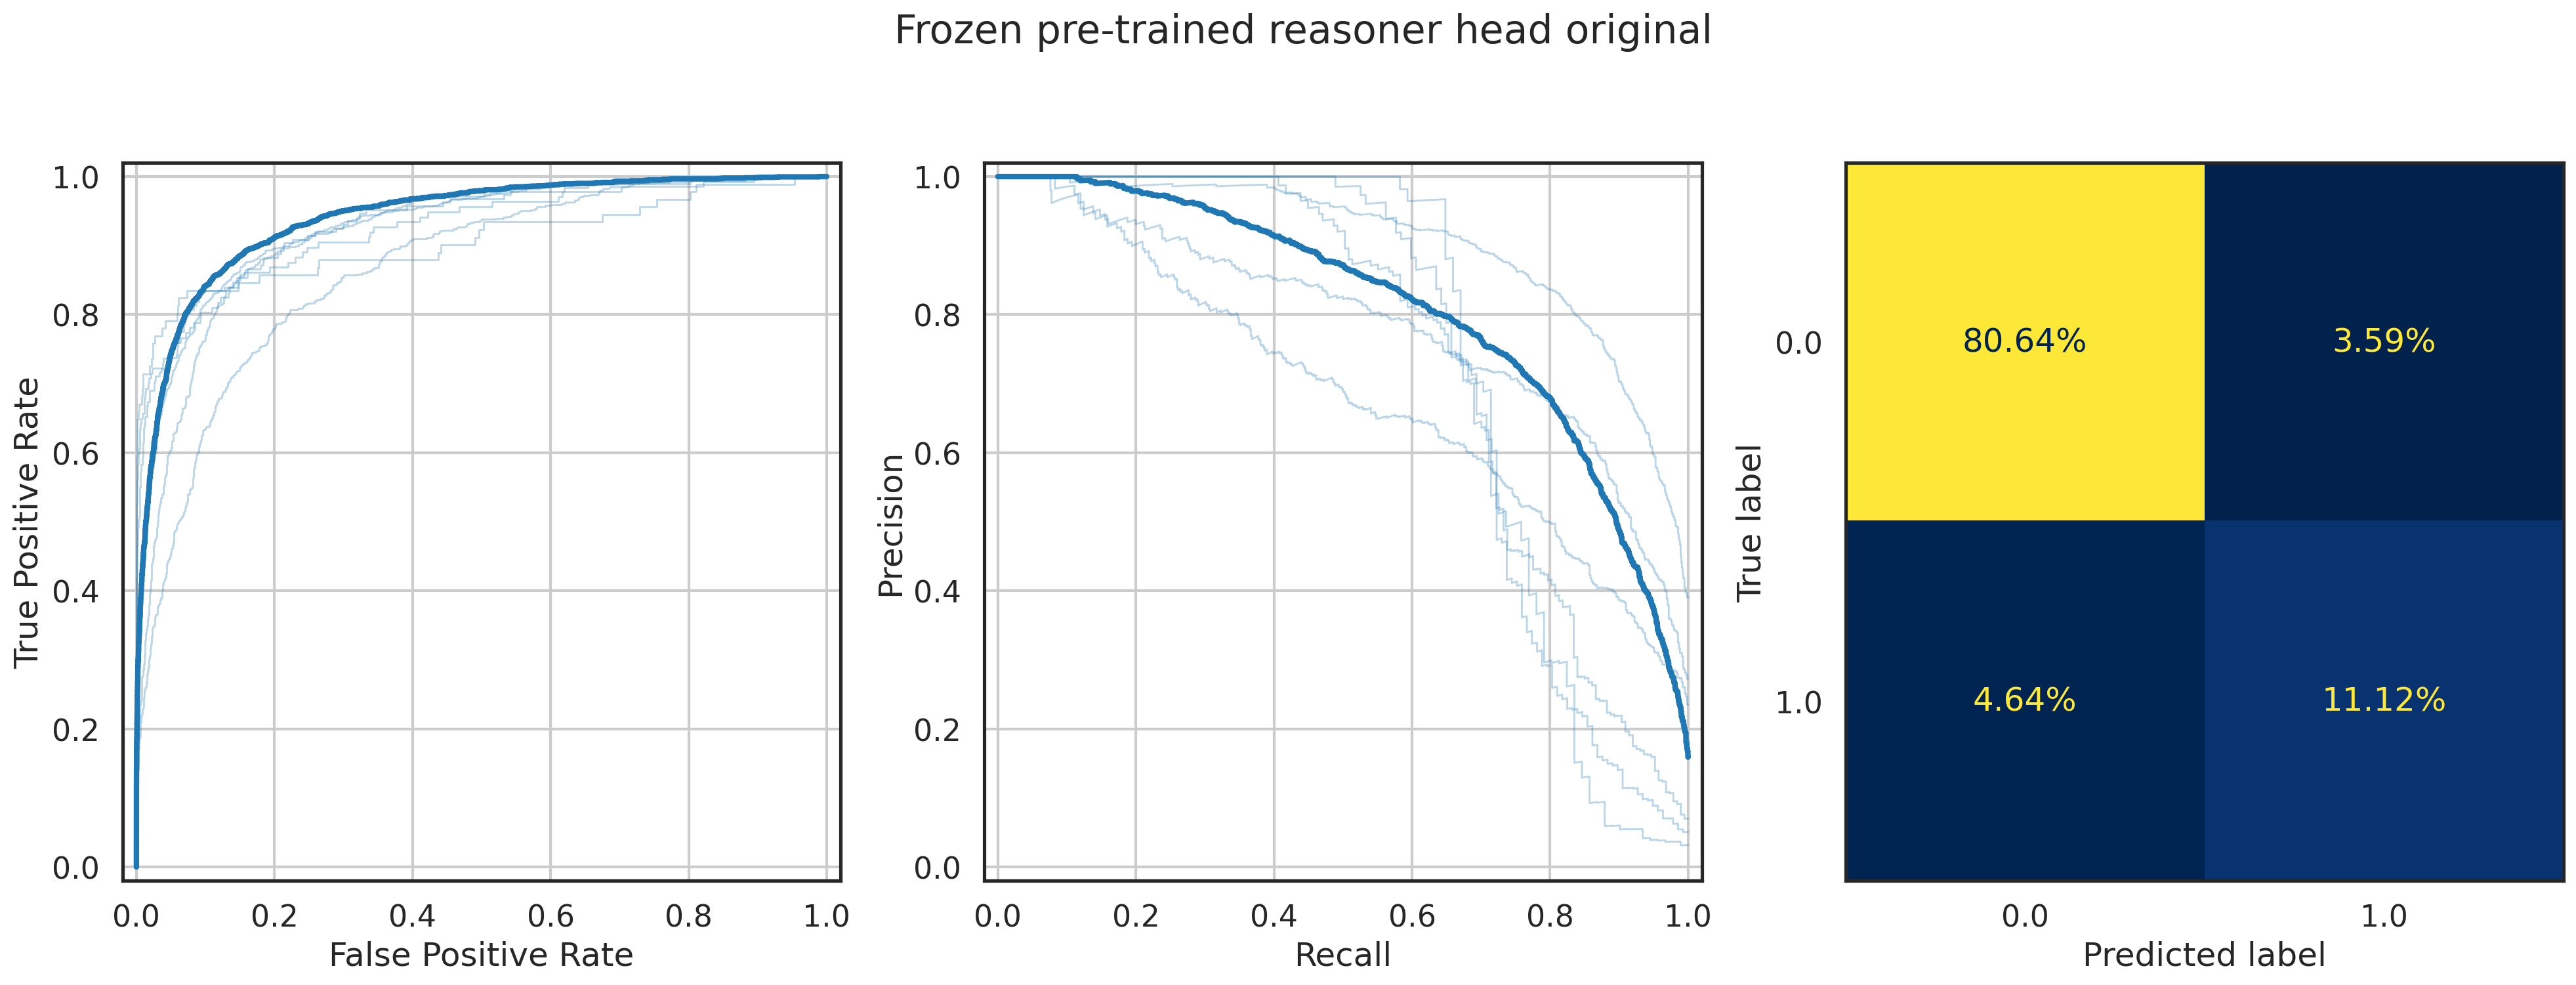

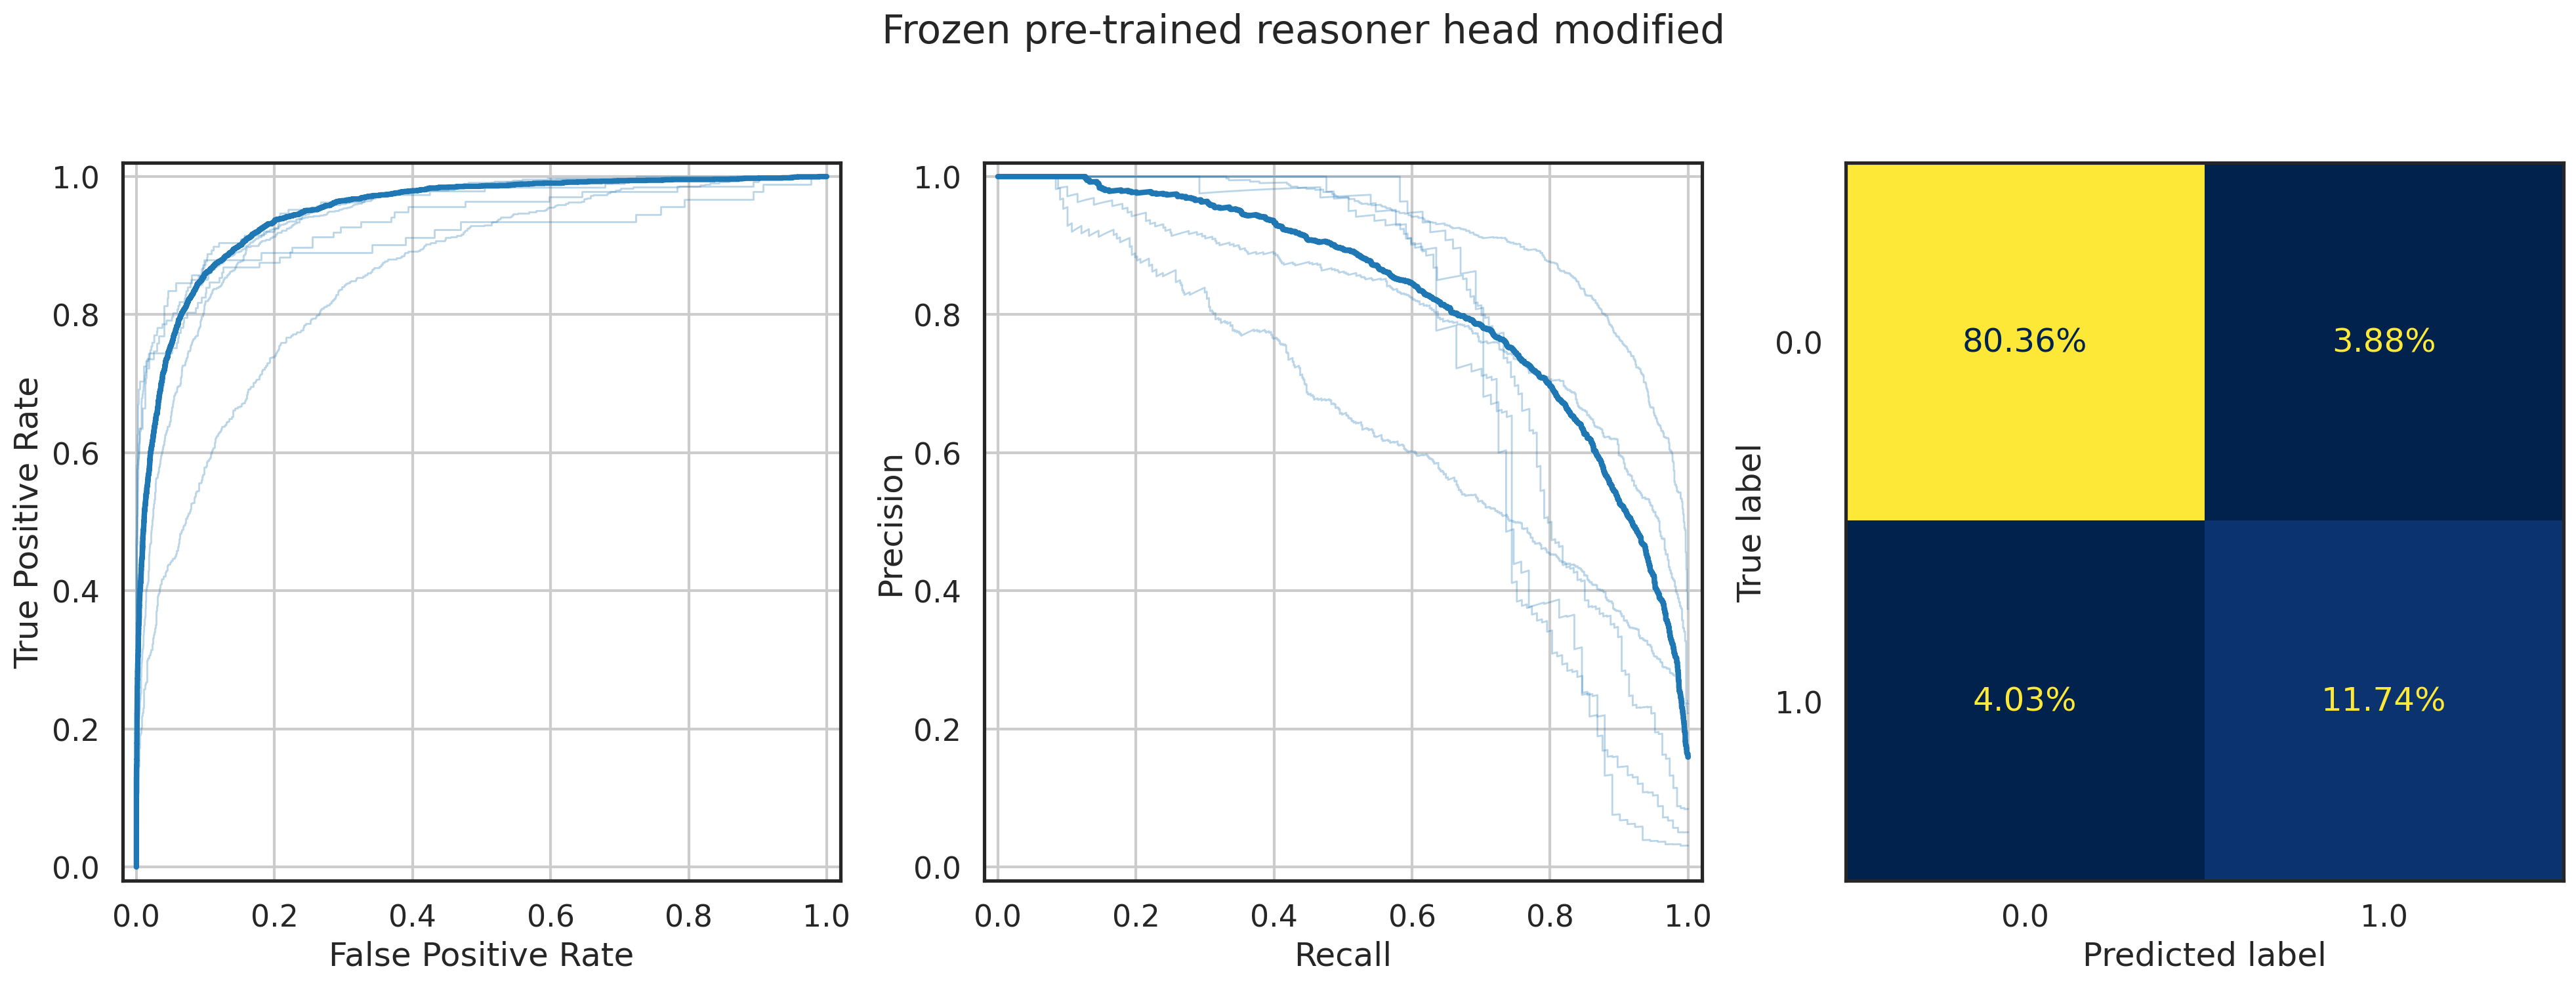

In [6]:
titles = 'Frozen pre-trained reasoner head original', 'Frozen pre-trained reasoner head modified'
logs = transfer_log_orig, transfer_log
heads = transfer_r_orig_head, transfer_r_head
embeddings = transfer_r_orig_embs, transfer_r_embs

base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

for head, embs, log, title in zip(heads, embeddings, logs, titles):
    print('------')
    with T.no_grad():
        head.eval()
        if title == 'Frozen pre-trained reasoner head original':
            _, _, Y_te = eval_batch(head, embs, X_te, y_te, idx_te)
        else:
            _, _, Y_te = eval_batch_mod(head, embs, X_te, y_te, idx_te)

    print(title)
    
    history_tr = pd.DataFrame(log.history_tr)
    test_history_by_onto = pd.DataFrame(log.history_vl_by_onto)
    test_history = pd.DataFrame(log.history_vl)
    test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te=Y_te))
    test_history.to_csv(base+f'/{title} test.csv', index=False)
    test_history_by_onto.to_csv(base+f'/{title} test by onto.csv', index=False)
    test_results.to_csv(base+f'/{title} test clas.csv', index=False)

    print('train time', history_tr.groupby('epoch').max().elapsed.sum())
    print(report(ontos, y_te, Y_te, idx_te).round(4))
    plt.suptitle(title)

In [7]:
onto_names = 'wildlife demacare stuff swo ontodt pizza'.split()
for head, embs, log, title in zip(heads, embeddings, logs, titles):
    df = pd.DataFrame(log.history_vl_by_onto)
    df = df[df.epoch == df.epoch.max()].drop(columns=['epoch', 'run', 'elapsed'])
    df.onto = df.onto.map(onto_names.__getitem__)
    print('-'*10)
    print(title)
    #print(df.agg(['mean', 'std']).round(4).T)
    print(df.round(4))

----------
Frozen pre-trained reasoner head original
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9607  0.6648  0.7267  0.6126   0.9334  0.7431  wildlife
61  0.9840  0.7273  0.8533  0.6337   0.9086  0.7274  demacare
62  0.8790  0.7297  0.7550  0.7061   0.9262  0.7890     stuff
63  0.8353  0.6086  0.5827  0.6368   0.8618  0.6742       swo
64  0.9777  0.7331  0.8214  0.6619   0.9398  0.7764    ontodt
65  0.8547  0.7881  0.8151  0.7629   0.9183  0.8873     pizza
----------
Frozen pre-trained reasoner head modified
       acc      f1    prec  recall  roc_auc  pr_auc      onto
60  0.9660  0.7182  0.7602  0.6806   0.9411  0.7973  wildlife
61  0.9833  0.7222  0.8228  0.6436   0.9111  0.7227  demacare
62  0.8767  0.7361  0.7288  0.7435   0.9338  0.8141     stuff
63  0.8167  0.5833  0.5370  0.6385   0.8506  0.6509       swo
64  0.9773  0.7444  0.7795  0.7122   0.9507  0.8090    ontodt
65  0.8767  0.8241  0.8329  0.8156   0.9409  0.9125     pizza


In [8]:
from src.id import print_identity_results
print(print_identity_results(transfer_r_orig_head, transfer_r_orig_embs, seed))

Double Negation:
  Mean Loss: 0.269065
  Std Dev Loss: 0.022910
  Mean Diff: 0.559087
  Std Dev Diff: 0.086649

Duality of Top and Bottom:
  Mean Loss: 0.375272
  Std Dev Loss: 0.000000
  Mean Diff: 0.763538
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.107466
  Std Dev Loss: 0.034940
  Mean Diff: 0.261328
  Std Dev Diff: 0.085953

Associativity:
  Mean Loss: 0.027029
  Std Dev Loss: 0.010216
  Mean Diff: 0.061350
  Std Dev Diff: 0.024700

Commutativity:
  Mean Loss: 0.025583
  Std Dev Loss: 0.013023
  Mean Diff: 0.059915
  Std Dev Diff: 0.030512

Contradiction:
  Mean Loss: 0.392303
  Std Dev Loss: 0.020618
  Mean Diff: 0.852206
  Std Dev Diff: 0.095415

Identity with Top:
  Mean Loss: 0.124248
  Std Dev Loss: 0.040192
  Mean Diff: 0.296522
  Std Dev Diff: 0.097420

Absorption by Bottom:
  Mean Loss: 0.452826
  Std Dev Loss: 0.021506
  Mean Diff: 0.837330
  Std Dev Diff: 0.044937

Top Concept Subsumption:
  Mean Loss: 0.001148
  Std Dev Loss: 0.000971
  Mean Diff: N/A
  Std De

In [9]:
print(print_identity_results(transfer_r_head, transfer_r_embs, seed))

Double Negation:
  Mean Loss: 0.000027
  Std Dev Loss: 0.000013
  Mean Diff: 0.000064
  Std Dev Diff: 0.000032

Duality of Top and Bottom:
  Mean Loss: 0.000255
  Std Dev Loss: 0.000000
  Mean Diff: 0.000465
  Std Dev Diff: 0.000000

Idempotence:
  Mean Loss: 0.092744
  Std Dev Loss: 0.031599
  Mean Diff: 0.219200
  Std Dev Diff: 0.079028

Associativity:
  Mean Loss: 0.016055
  Std Dev Loss: 0.007265
  Mean Diff: 0.035918
  Std Dev Diff: 0.016203

Commutativity:
  Mean Loss: 0.017512
  Std Dev Loss: 0.010257
  Mean Diff: 0.040859
  Std Dev Diff: 0.025162

Contradiction:
  Mean Loss: 0.179317
  Std Dev Loss: 0.042843
  Mean Diff: 0.276149
  Std Dev Diff: 0.057695

Identity with Top:
  Mean Loss: 0.049837
  Std Dev Loss: 0.021086
  Mean Diff: 0.118984
  Std Dev Diff: 0.053374

Absorption by Bottom:
  Mean Loss: 0.018680
  Std Dev Loss: 0.007928
  Mean Diff: 0.048255
  Std Dev Diff: 0.017591

Top Concept Subsumption:
  Mean Loss: 0.001039
  Std Dev Loss: 0.001138
  Mean Diff: N/A
  Std De